In [1]:
# %pip install numpy matplotlib opencv-python ipywidgets ipympl

In [2]:
%matplotlib inline

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

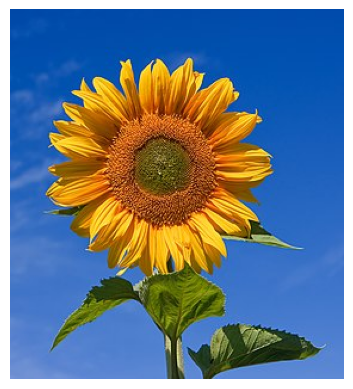

In [4]:
# Leitura da imagem
# img = cv2.imread('images/torre.webp')  ### bom exemplo
img = cv2.imread('images/girasol.jpg') ### bom exemplo
# img = cv2.imread('images/bart011.bmp')

# Converte a imagem que foi lida com os canais na ordem BGR para RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# exibe imagem sem eixos
plt.imshow(img)
plt.axis('off')
plt.show()

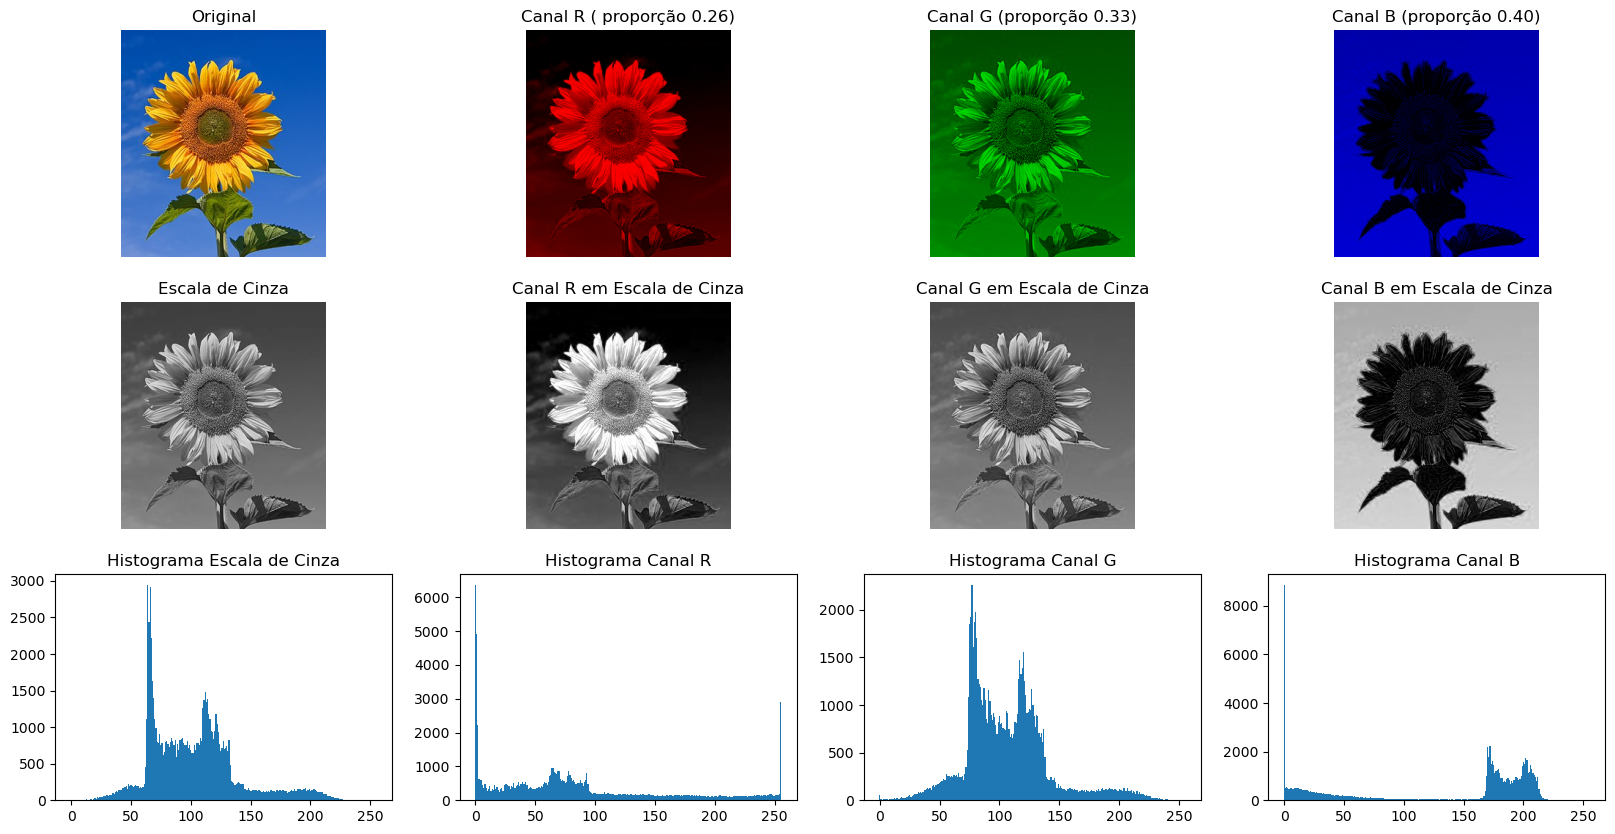

In [5]:
# Prepara os espaços para exibir as imagens
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12) ) = plt.subplots(3,4,figsize=(20,10))

# Calcula proporção dos pixels em cada canal, somando-os então dividindo-os pelo valor total da soma
num_elems = cv2.sumElems(img)
pr, pg, pb, _ = np.array(num_elems)/sum(num_elems)
# print(f"Proporção de pixels no total:\nR: {pr:.2f}\nG: {pg:.2f}\nB: {pb:.2f}")

# Coloca a imagem no eixo
ax1.imshow(img)
ax1.set_title('Original')
ax1.axis('off')

# Isola o canal R zerando os demais canais
img_r = img.copy()
img_r[:,:,1] = 0
img_r[:,:,2] = 0

# Coloca a imagem no eixo
ax2.imshow(img_r)
ax2.set_title(f'Canal R ( proporção {pr:.2f})')
ax2.axis('off')

# Isola o canal G zerando os demais canais
img_g = img.copy()
img_g[:,:,0] = 0
img_g[:,:,2] = 0

# Coloca a imagem no eixo
ax3.imshow(img_g)
ax3.set_title(f'Canal G (proporção {pg:.2f})')
ax3.axis('off')

# Isola o canal B zerando os demais canais
img_b = img.copy()
img_b[:,:,0] = 0
img_b[:,:,1] = 0

# Coloca a imagem no eixo
ax4.imshow(img_b)
ax4.set_title(f'Canal B (proporção {pb:.2f})')
ax4.axis('off')

# Converte a imagem em tons de cinza considerando todos os canais
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Coloca a imagem no eixo
ax5.imshow(img_gray, 'gray')
ax5.set_title('Escala de Cinza')
ax5.axis('off')

# 0: "red" 1: "green" 2: "blue" <- como seleciona só um canal então fica cinza
# Seleciona apenas o canal R, colocando a imagem em niveis de cinza (intensidade)
ax6.imshow(img[:,:,0], 'gray')
ax6.set_title(f'Canal R em Escala de Cinza')
ax6.axis('off')

# Seleciona apenas o canal G, colocando a imagem em niveis de cinza (intensidade)
ax7.imshow(img[:,:,1], 'gray')
ax7.set_title(f'Canal G em Escala de Cinza')
ax7.axis('off')

# Seleciona apenas o canal B, colocando a imagem em niveis de cinza (intensidade)
ax8.imshow(img[:,:,2], 'gray')
ax8.set_title(f'Canal B em Escala de Cinza')
ax8.axis('off')

# Gera histograma da imagem em tons de cinza
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Coloca o gráfico no eixo
ax9.bar(np.arange(256), hist_gray.flatten(), width=1)
ax9.set_title('Histograma Escala de Cinza')

# Gera histograma usando apenas o canal R
hist_r = cv2.calcHist([img[:,:,0]], [0], None, [256], [0, 256])

# Coloca o gráfico no eixo
ax10.bar(np.arange(256), hist_r.flatten(), width=1)
ax10.set_title('Histograma Canal R')

# Gera histograma usando apenas o canal G
hist_g = cv2.calcHist([img[:,:,1]], [0], None, [256], [0, 256])

# Coloca o gráfico no eixo
ax11.bar(np.arange(256), hist_g.flatten(), width=1)
ax11.set_title('Histograma Canal G')

# Gera histograma usando apenas o canal B
hist_b = cv2.calcHist([img[:,:,2]], [0], None, [256], [0, 256])

# Coloca o gráfico no eixo
ax12.bar(np.arange(256), hist_b.flatten(), width=1)
ax12.set_title('Histograma Canal B')

# Exibe as imagens
plt.show()

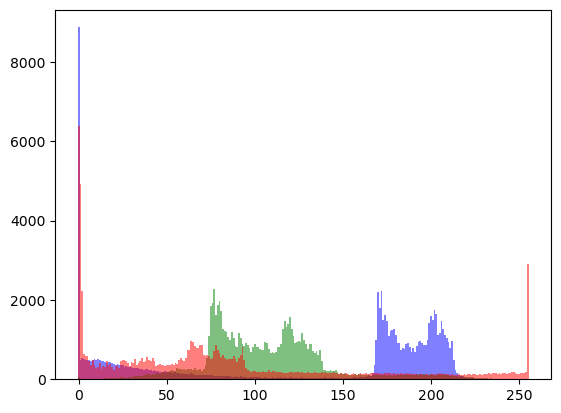

In [6]:
# Coloca os gráficos no mesmo eixo e os exibe
plt.bar(np.arange(256), hist_b.flatten(), width=1, color='b', alpha=0.5)
plt.bar(np.arange(256), hist_g.flatten(), width=1, color='g', alpha=0.5)
plt.bar(np.arange(256), hist_r.flatten(), width=1, color='r', alpha=0.5)

# Exibe o gráfico
plt.show()

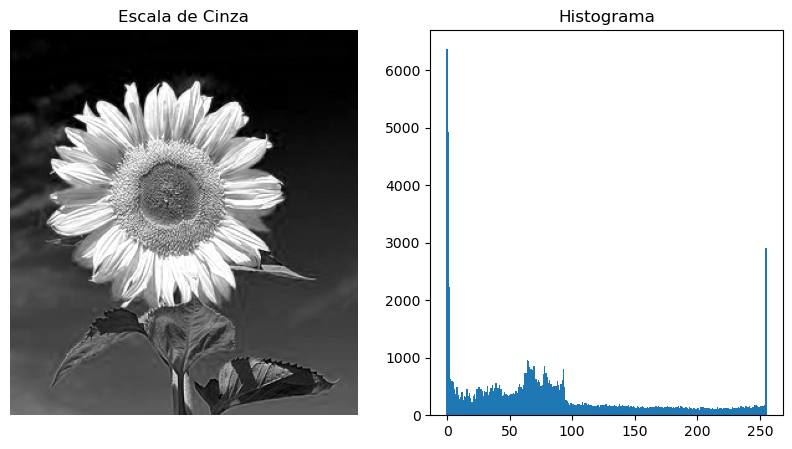

In [7]:
# Converte para cinza apenas o canal que deu mais contraste, depende da imagem. 
# Vermelho aparentou possuir um bom contraste em relação aos demais canais.
# img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # normaliza demais e parte do fundo acaba ficando com tons de cinza próximos, atrapalhando o threshold
# img_gray = cv2.cvtColor(img_r, cv2.COLOR_RGB2GRAY) # como só tem um canal preenchido, os pesos das outras cores achatam o histograma, mas a imagem não sofre alteração significativa
img_gray = img[:,:,0] # 0: "red" 1: "green" 2: "blue" <- como seleciona só um canal então fica cinza

hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Prepara espaços para as imagens
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

# Insere imagem
ax1.imshow(img_gray,'gray')
ax1.set_title('Escala de Cinza')
ax1.axis('off')

# Insere imagem
ax2.bar(np.arange(256), hist.flatten(), width=1)#, color='r', alpha=0.5)
ax2.set_title('Histograma')
# Exibe as imagens
plt.show()

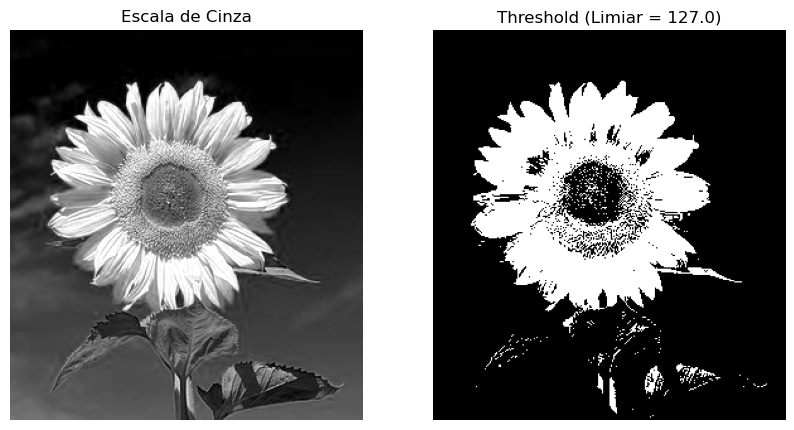

In [8]:
# Imagem binária em que os pixels são brancos se estiverem acima do limiar e pretos se estiverem abaixo.
# Teoricamente é preciso montar o histograma para saber a disposição dos pixels
limiar, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Prepara espaços para as imagens
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

# Insere imagem
ax1.imshow(img_gray,'gray')
ax1.set_title('Escala de Cinza')
ax1.axis('off')

# Insere imagem
ax2.imshow(img_bin,'gray')
ax2.set_title(f'Threshold (Limiar = {limiar})')
ax2.axis('off')

# Exibe as imagens
plt.show()

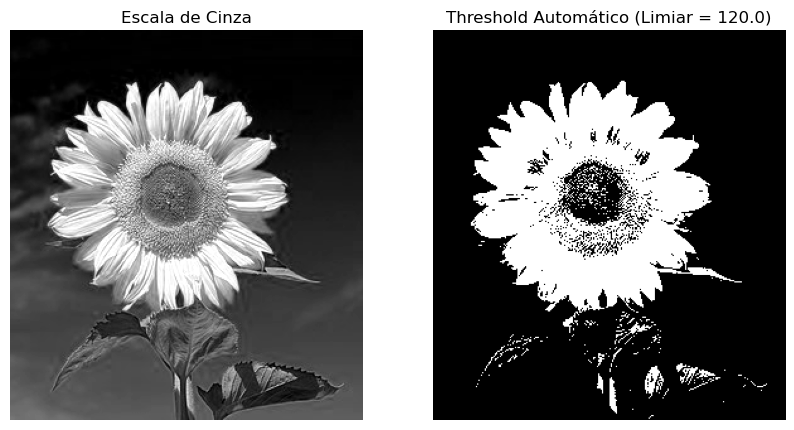

In [9]:
# Automatic Thresholding com o algoritmo OTSU.
# Esse algoritmo de limiarização automática determina o valor de limiar automaticamente 
# com base na distribuição dos níveis de intensidade dos pixels na imagem.
limiar, img_bin_auto = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Prepara espaços para as imagens
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

# Insere imagem
ax1.imshow(img_gray,'gray')
ax1.set_title('Escala de Cinza')
ax1.axis('off')

# Insere imagem
ax2.imshow(img_bin_auto,'gray')
ax2.set_title(f'Threshold Automático (Limiar = {limiar})')
ax2.axis('off')

# Exibe as imagens
plt.show()

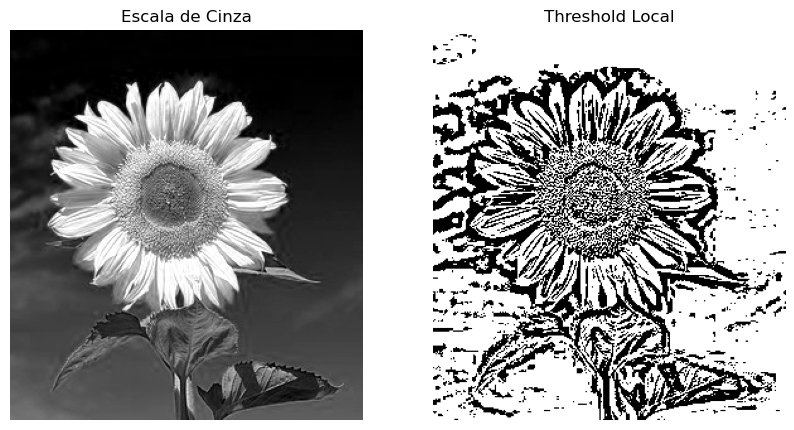

In [10]:
# Local Thresholding
# Aplica Local Thresholding com o método de limiarização adaptativa Mean
img_bin_local = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Prepara espaços para as imagens
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

# Insere imagem
ax1.imshow(img_gray,'gray')
ax1.set_title('Escala de Cinza')
ax1.axis('off')

# Insere imagem
ax2.imshow(img_bin_local,'gray')
ax2.set_title(f'Threshold Local')
ax2.axis('off')

# Exibe as imagens
plt.show()

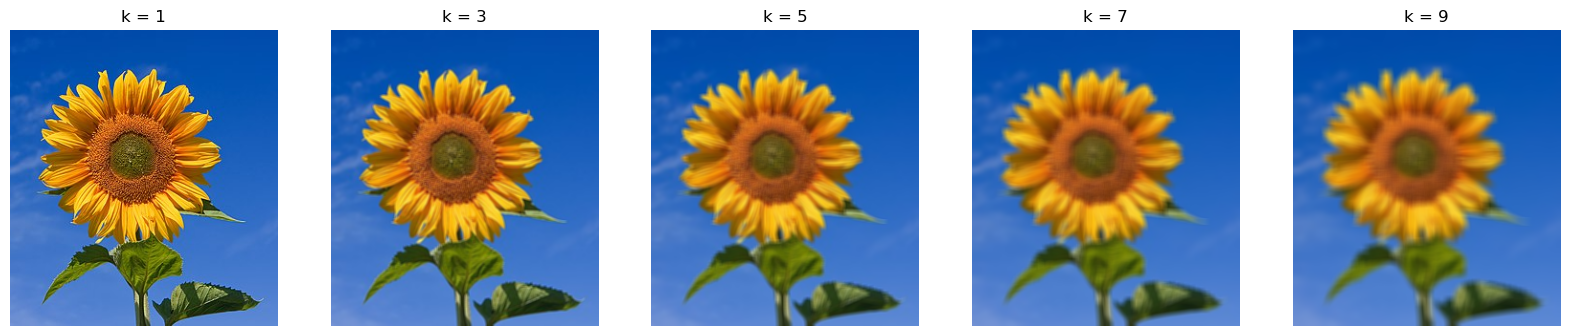

In [11]:
# Aplica filtro da média com diferente tamanhos de kernel
# Esse filtro suaviliza a imagem e remove alguns ruídos
avg = [ cv2.blur(img, (k,k)) for k in range(10) if k % 2 == 1 ] # kernel de 5x5 pixels

# Prepara espaços para as imagens
fig, axes = plt.subplots(1,len(avg), figsize=(20,10))

# Percorre a lista das imagens resultantes do filtro e insere nos espaços
for i,k in enumerate([k for k in range(10) if k % 2 == 1]):
    axes[i].imshow(avg[i],'gray')
    axes[i].set_title(f'k = {k}')
    axes[i].axis('off')
    
# Exibe as imagens
plt.show()

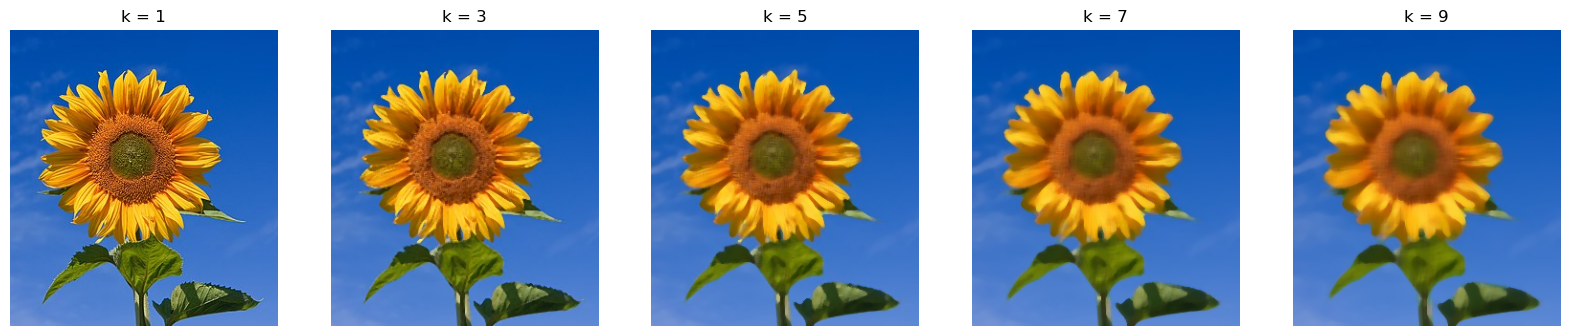

In [12]:
# Aplica filtro da média com diferente tamanhos de kernel
# Esse filtro suaviliza a imagem e remove alguns ruídos
median = [ cv2.medianBlur(img, k) for k in range(10) if k % 2 == 1 ] # kernel de 5x5 pixels

# Prepara espaços para as imagens
fig, axes = plt.subplots(1,len(median), figsize=(20,10))

# Percorre a lista das imagens resultantes do filtro e insere nos espaços
for i,k in enumerate([k for k in range(10) if k % 2 == 1]):
    axes[i].imshow(median[i],'gray')
    axes[i].set_title(f'k = {k}')
    axes[i].axis('off')
    
# Exibe as imagens
plt.show()

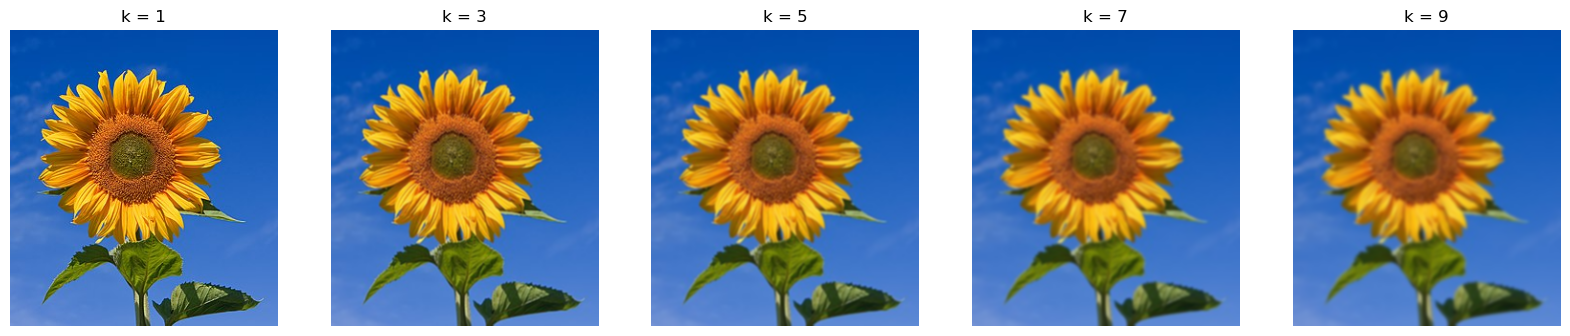

In [13]:
# Aplica filtro da média com diferente tamanhos de kernel
# Esse filtro suaviliza a imagem e remove alguns ruídos
gaussian = [ cv2.GaussianBlur(img,(k,k),0,0) for k in range(10) if k % 2 == 1 ] # kernel de 5x5 pixels

# Prepara espaços para as imagens
fig, axes = plt.subplots(1,len(gaussian), figsize=(20,10))

# Percorre a lista das imagens resultantes do filtro e insere nos espaços
for i,k in enumerate([k for k in range(10) if k % 2 == 1]):
    axes[i].imshow(gaussian[i],'gray')
    axes[i].set_title(f'k = {k}')
    axes[i].axis('off')
    
# Exibe as imagens
plt.show()

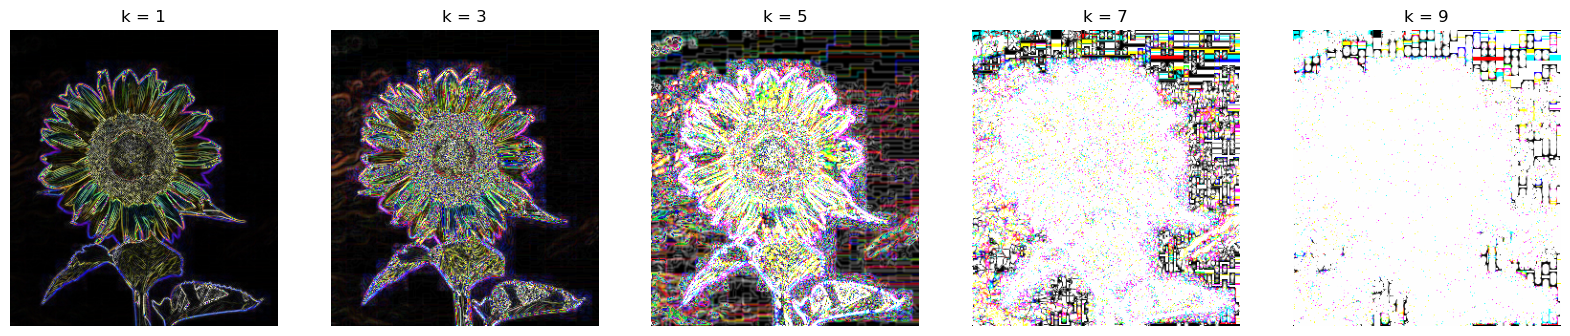

In [14]:
# Define função para aplicar sobel utilizando list comprehension
def apply_sobel(img, k):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=k)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=k)
    return cv2.convertScaleAbs(sobelx) + cv2.convertScaleAbs(sobely)

# Aplica filtro da média com diferente tamanhos de kernel
# Esse filtro suaviliza a imagem e remove alguns ruídos
sobel = [ apply_sobel(img,k) for k in range(10) if k % 2 == 1 ] # kernel de 5x5 pixels

# Prepara espaços para as imagens
fig, axes = plt.subplots(1,len(sobel), figsize=(20,10))

# Percorre a lista das imagens resultantes do filtro e insere nos espaços
for i,k in enumerate([k for k in range(10) if k % 2 == 1]):
    axes[i].imshow(sobel[i],'gray')
    axes[i].set_title(f'k = {k}')
    axes[i].axis('off')
    
# Exibe as imagens
plt.show()

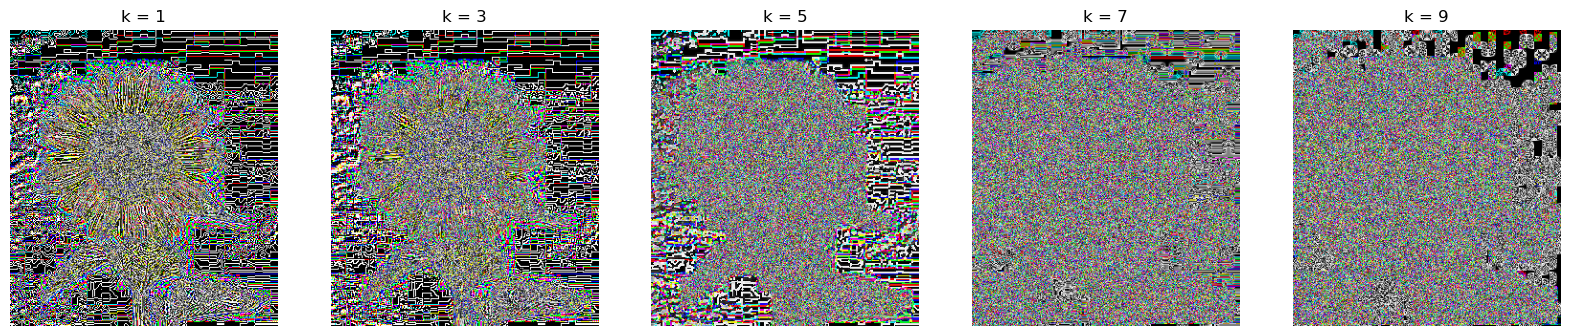

In [15]:
# Aplica filtro da média com diferente tamanhos de kernel
# Esse filtro suaviliza a imagem e remove alguns ruídos
laplacian = [ cv2.Laplacian(img, cv2.CV_64F, ksize=k).astype('uint8') for k in range(10) if k % 2 == 1 ] # kernel de 5x5 pixels

# Prepara espaços para as imagens
fig, axes = plt.subplots(1,len(laplacian), figsize=(20,10))

# Percorre a lista das imagens resultantes do filtro e insere nos espaços
for i,k in enumerate([k for k in range(10) if k % 2 == 1]):
    axes[i].imshow(laplacian[i],'gray')
    axes[i].set_title(f'k = {k}')
    axes[i].axis('off')
    
# Exibe as imagens
plt.show()

In [16]:
img_cp = img.copy()
I, J, _ = img_cp.shape

for i in range(I):
    for j in range(J):
        # if avg[1][i,j] == 0:
        if img_bin_auto[i,j] == 0:
            img_cp[i,j] = 0

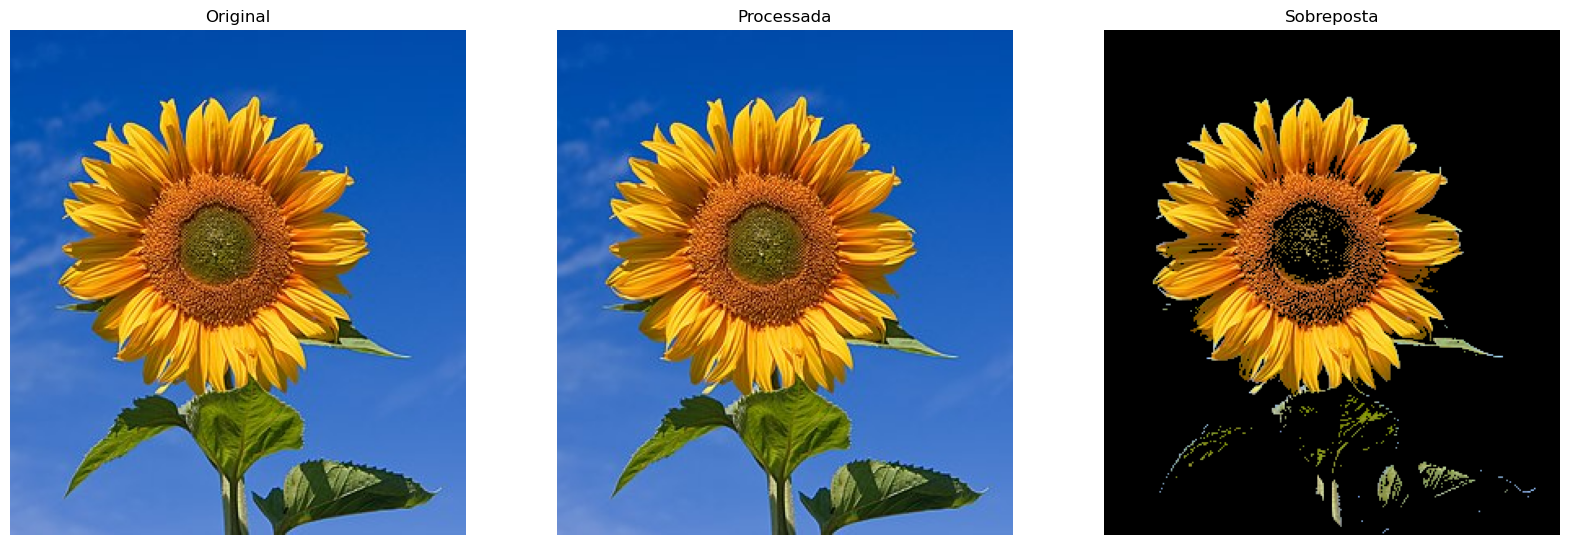

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,10))

ax1.imshow(img)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(avg[0],'gray')
ax2.set_title(f'Processada')
ax2.axis('off')

ax3.imshow(img_cp)
ax3.set_title(f'Sobreposta')
ax3.axis('off')

plt.show()